# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [81]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn -q

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [82]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
df = df.copy()

In [85]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [86]:
df.shape

(1898, 9)

#### Observations:

* There are 1898 rows and 9 columns present in the data set
* This indicates that the dataset is moderate sized and is suitable for our analysis.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   There are 9 columns in the dataset provided and their datatypes are as follows

| Column Number | Column Name| Data type |
|:-------------:|:--------------:|:--------------:|
| 0     |   order_id      |   int64     |
| 1 | customer_id   |   int64|
| 2 | restaurant_name   |   object|
| 3 | cuisine_type   |   object|
| 4 | cost_of_the_order   |   float64|
| 5 | day_of_the_week   |   object|
| 6 | rating   |   object|
| 7 | food_preparation_time   |   int64|
| 8 | delivery_time   |   int64|

* Dataset contains a mix of numeric (int, float) and categorical variables (Object).
* Rating is stored as an object which means we will have to convert it to a numerical value to perform our analysis.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [88]:
# No there are no missing values in data
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:



*   There are no missing values in data




### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [89]:
df.describe().T.loc['food_preparation_time'].map(lambda x: round(x, 2)) #output is formatted to decimal precision of 2 for better redability


,food_preparation_time
count,1898.00
mean,27.37
std,4.63
min,20.00
25%,23.00
50%,27.00
75%,31.00
max,35.00


#### Observations:

* Minimum Food preparation time: 20 (assuming time is in min)
* Maximum Food preparation time: 35 (assuming time is in min)
* Average food preparation time: 27.37 (assuming time is in min and rounding it to 2 decimals)
* Low standard deviation suggests that there are no inefficiencies in food prep time meaning food prep time is pretty predictable across restaurants

### **Question 5:** How many orders are not rated? [1 mark]

In [90]:
len(df[df["rating"] == "Not given"])

736

In [91]:
# calculating percentage of Not given ratings in the dataset and formatting it to 2 decimals for readability
round(((df[df["rating"] == "Not given"].shape[0]/df.shape[0]) * 100), 2)

38.78

#### Observations:
* There are 736 orders that are not rated

* There are close to 39% of orders which are not rated, this could skew results when calculating averages for the dataset.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

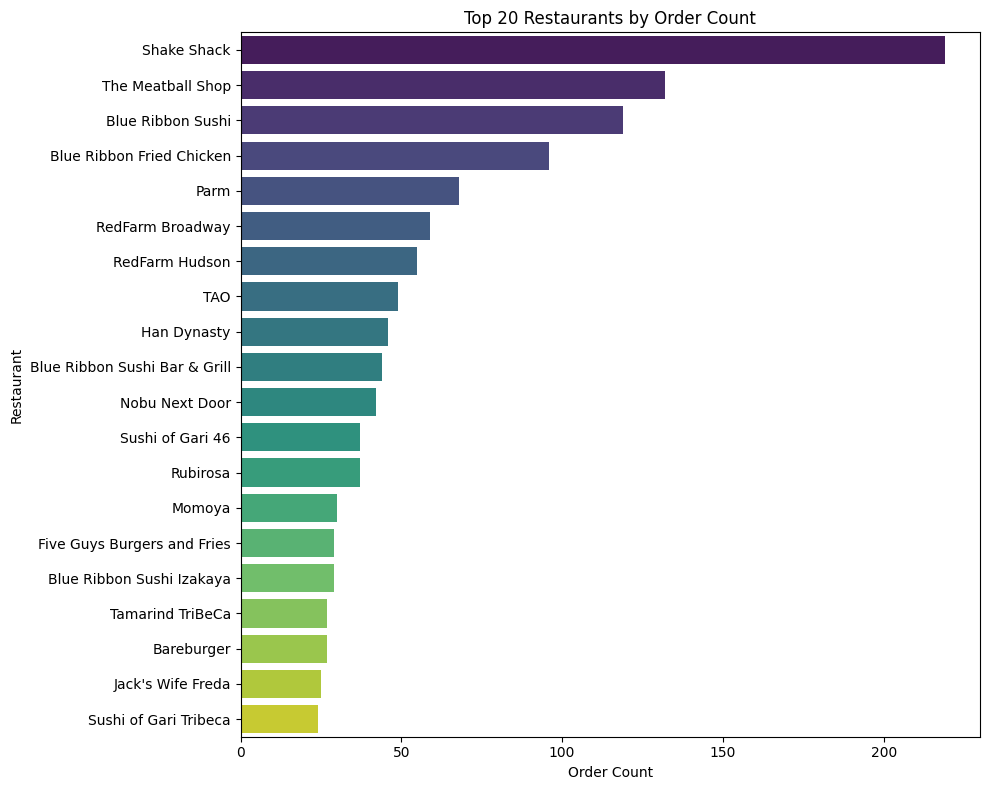

In [92]:
df['restaurant_name'].nunique()

restaurant_counts = df['restaurant_name'].value_counts().head(20).reset_index()
restaurant_counts.columns = ['restaurant_name', 'count']
plt.figure(figsize=(10, 8))
sns.barplot(data=restaurant_counts, y='restaurant_name', x='count', hue="restaurant_name", palette='viridis')
plt.title('Top 20 Restaurants by Order Count')
plt.xlabel('Order Count')
plt.ylabel('Restaurant')
plt.tight_layout()
plt.show()

* A few restaurants dominate order volume, especially Shake Shack, The Meatball Shop, and Blue Ribbon Sushi.

* Long-tail distribution — many restaurants receive fewer than 30 orders.

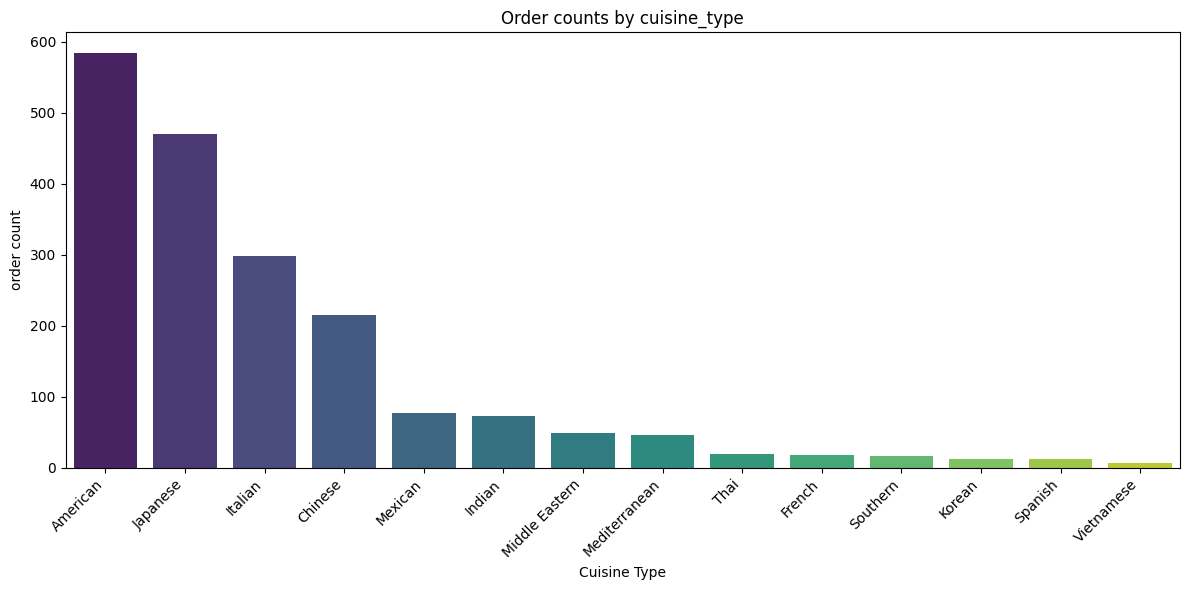

In [93]:
df['cuisine_type'].nunique()

cuisine_counts = df['cuisine_type'].value_counts().reset_index()
cuisine_counts.columns = ['cuisine_type', 'count']
plt.figure(figsize=(12, 6))
sns.barplot(data=cuisine_counts, x='cuisine_type', y='count', hue='cuisine_type', palette='viridis')
plt.title('Order counts by cuisine_type')
plt.xlabel('Cuisine Type')
plt.ylabel('order count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* There are 14 unique cuisine types that restaurants are categorized into

* American cuisine is the most ordered (415 orders), followed by Japanese, Mexican, and Italian.

* Customer preference appears strongly oriented toward Western fast-casual cuisine.

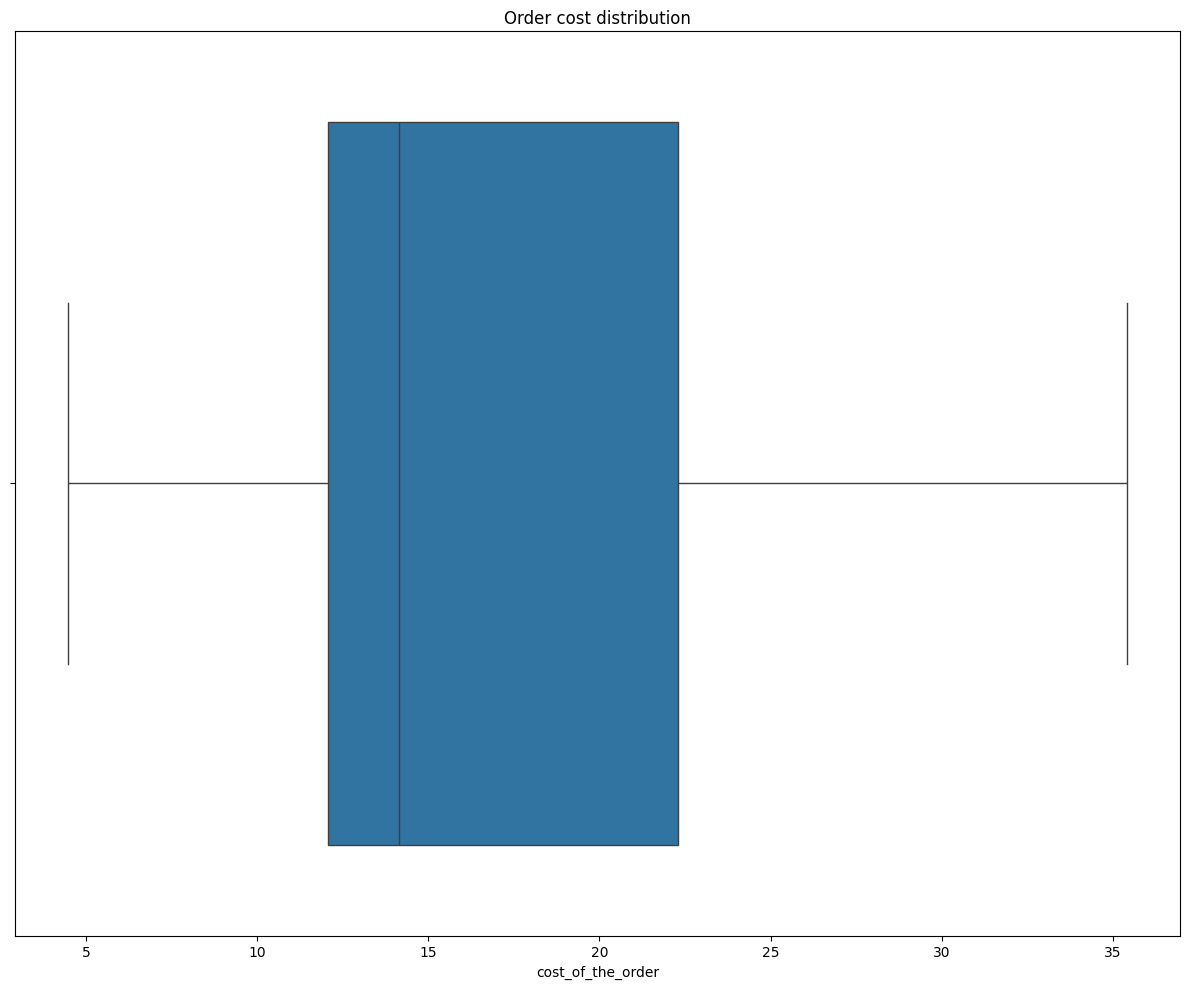

In [94]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=df, x='cost_of_the_order')
plt.title('Order cost distribution')
plt.tight_layout()
plt.show()

* Order cost is right-skewed, with most orders between \$10- \$20.

* Very few orders exceed $30, indicating a mid-range pricing market.

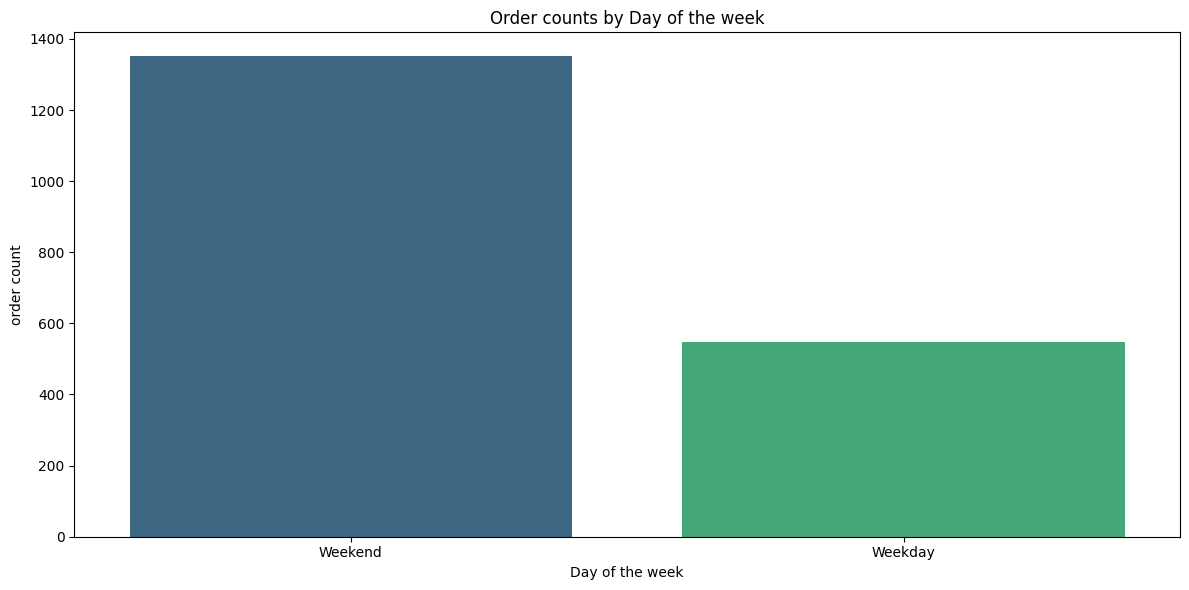

In [95]:
key = 'day_of_the_week'
df[key].nunique()

cuisine_counts = df[key].value_counts().reset_index()
cuisine_counts.columns = [key, 'count']
plt.figure(figsize=(12, 6))
sns.barplot(data=cuisine_counts, x=key, y='count', hue='day_of_the_week', palette='viridis')
plt.title('Order counts by Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('order count')
plt.tight_layout()
plt.show()



* There are only weekend and non-weeekend category in the data column
* Volume of orders spike on weekends when compared to weekdays

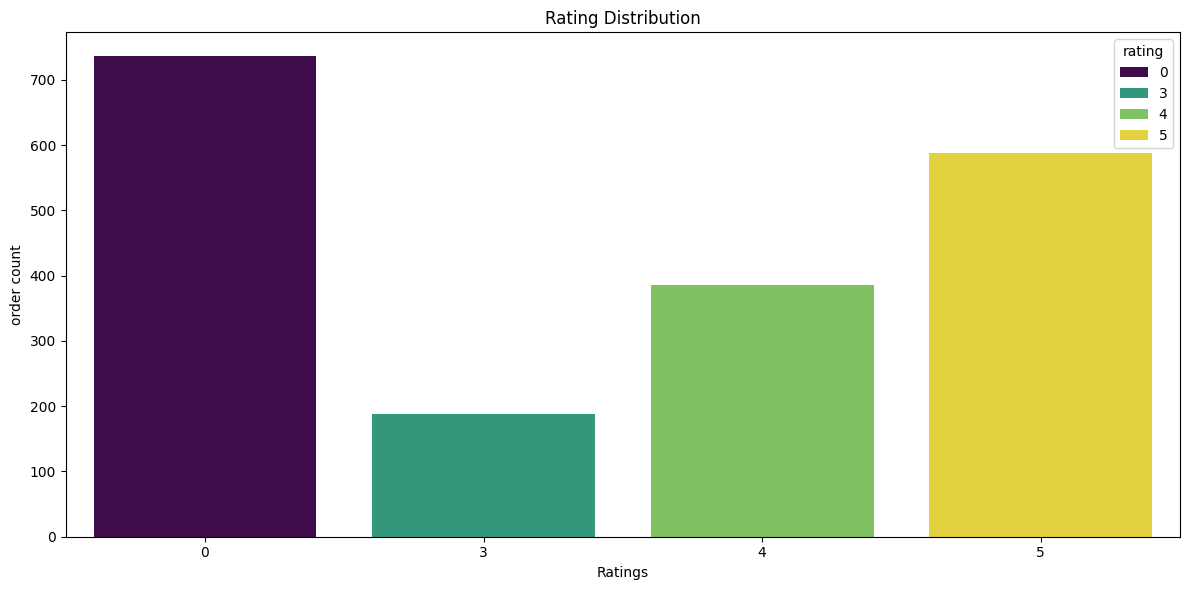

In [96]:
def rating_map(rating):
  if rating == "Not given": # Not given rating is assumed as 0 rating
    return 0
  else:
    return int(rating)

#converting rating into a numerical value from object to help with data analysis and interpretation
df['rating'] = df["rating"].map(rating_map)

key = 'rating'
df[key].nunique()

rating_counts = df[key].value_counts().reset_index()
rating_counts.columns = [key, 'count']
plt.figure(figsize=(12, 6))
sns.barplot(data=rating_counts, x=key, y='count', hue='rating', palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('Ratings')
plt.ylabel('order count')
plt.tight_layout()
plt.show()



* Most number of orders are not rated
* among rated orders most of them are rated 5
* None of the orders are rated 2

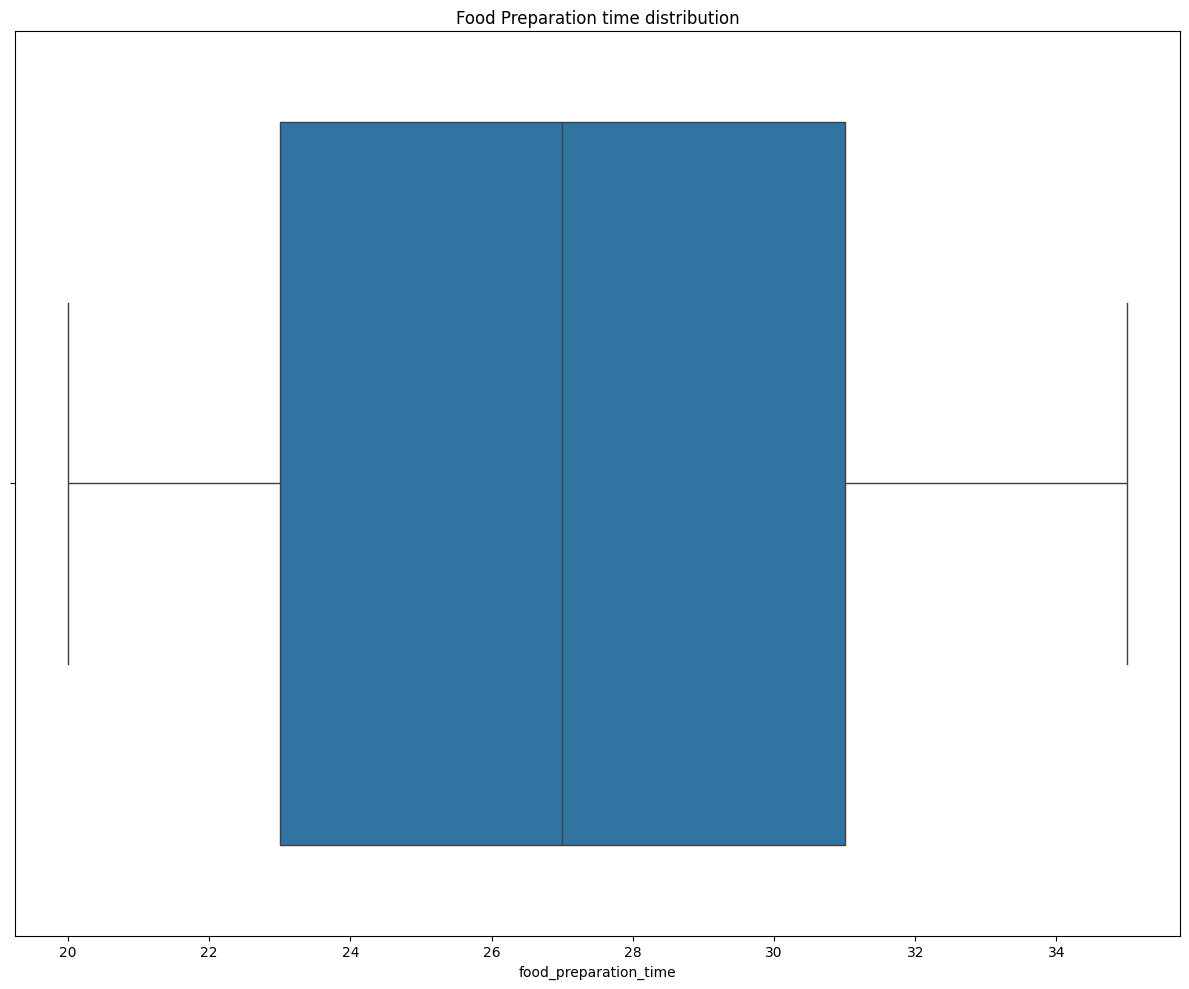

In [97]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=df, x='food_preparation_time')
plt.title('Food Preparation time distribution')
plt.tight_layout()
plt.show()

* On avg food preparation time is around 27 min
* More than 75% of orders are prepared under 31 min
* This indicates efficiency in food prep time and enables smoother delievery process once food is prepared

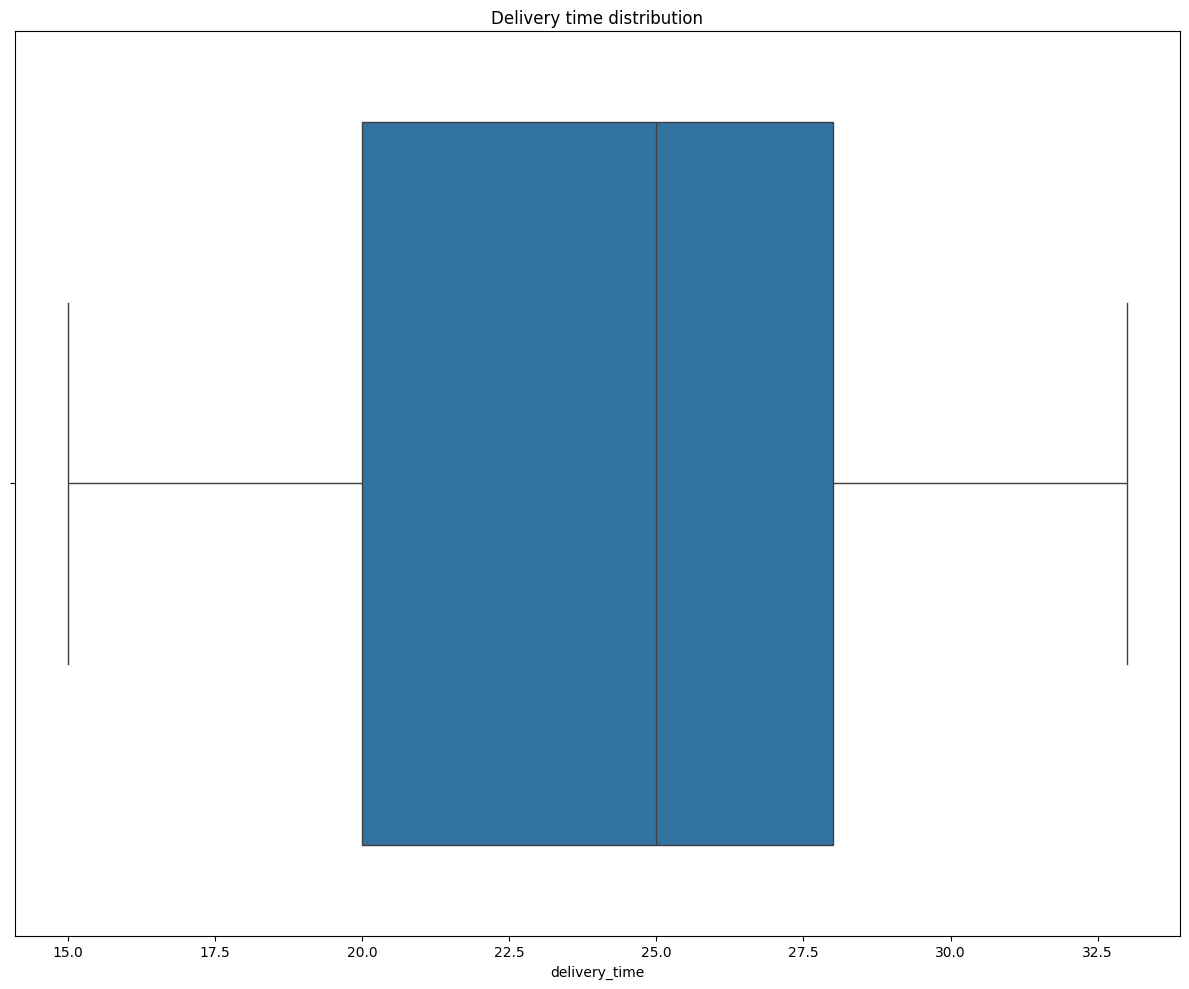

In [98]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=df, x='delivery_time')
plt.title('Delivery time distribution')
plt.tight_layout()
plt.show()

* The median delivery time is 24 minutes, meaning half of all orders arrive within this time.

* Delivery times are highly consistent, mostly falling between 20 and 30 minutes.

* There are no significant outliers, indicating a stable and predictable delivery process.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [99]:
counts = df['restaurant_name'].value_counts().reset_index()
counts.columns = ['restaurant_name', 'order_count']
counts.head(5)

,restaurant_name,order_count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:

* Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken,
and Parm are the top five restaurants in that order.

| Rank | Restaurant Name|  Order Count |
|:-------------:|:--------------:|:--------------:|
| 1     |   Shake Shack      |   219     |
| 2 | The Meatball Shop   |   132|
| 3 | Blue Ribbon Sushi   |   119|
| 4 | Blue Ribbon Fried Chicken   |   96|
| 5 | Parm   |   68|

* The top 5 restaurants account for a disproportionately high share of total orders.

* Marketing and partnership strategies could prioritize these high-performing restaurants.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [100]:
df[df['day_of_the_week'] == 'Weekend'].value_counts('cuisine_type').head(1)

,count
cuisine_type,
American,415


#### Observations:
* American cuisine is the most popular on weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [101]:
print(round((df['cost_of_the_order'] > 20.00).mean() * 100, 2)) # formatting percentage to 2 decimals for readability

29.24


#### Observations:
* 29.24 % of the orders have more than \$20 of cost, that means almost 3 out of 10 orders cost more than \$20

* The remaining ~70% of orders are priced \$20 or below, showing that the platform primarily serves mid-range, budget-friendly meals.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [102]:
# Formatted to 2 decimals for readability
print(round((df['delivery_time']).mean(), 2))

24.16


#### Observations:
* Mean delivery time is 24.16 min, close to 24 min.
* Lower weekday speed may be due to traffic, or workforce availability.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [103]:
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
* Customers with id 52832, 47440 and 83287 are the highest oredring customers.

| Rank | Customer Id|  Order Count |
|:-------------:|:--------------:|:--------------:|
| 1     |   52832      |   13     |
| 2 | 47440   |   10|
| 3 | 83287  |   9|

* The top 3 customers placed 13, 10, and 9 orders respectively, indicating decent repeat behavior.

* These customers are ideal candidates for loyalty programs and promotional incentives


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Observations:


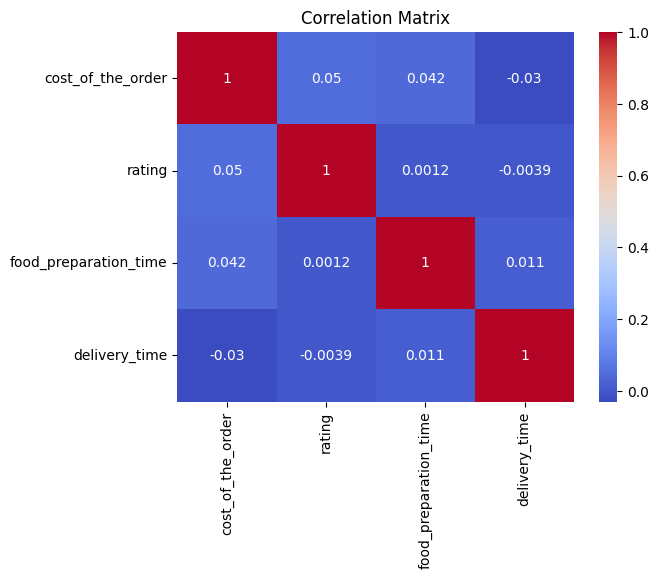

In [104]:
sns.heatmap(data=df[[
       'cost_of_the_order', 'rating',
       'food_preparation_time', 'delivery_time']].corr(), annot=True, cmap='coolwarm');
plt.title('Correlation Matrix');
plt.show()

* From the above plot we can confidently say that none of the values have any
  strong correlation with each other, as most of the correlations lie in between -0.03 and 0.05

* Order cost does not influence preparation time, delivery time or ratings

* Food preparation and delivery time also does not effect ratings

* Overall, prep time, delivery time and customer perception are all     independent in this dataset

* Higher-priced orders do not show a strong correlation with delivery time, suggesting consistent delivery across price ranges.

* The dataset suggests that operational efficiency is consistent, and customer satisfaction is likely driven by food quality rather than speed or price.

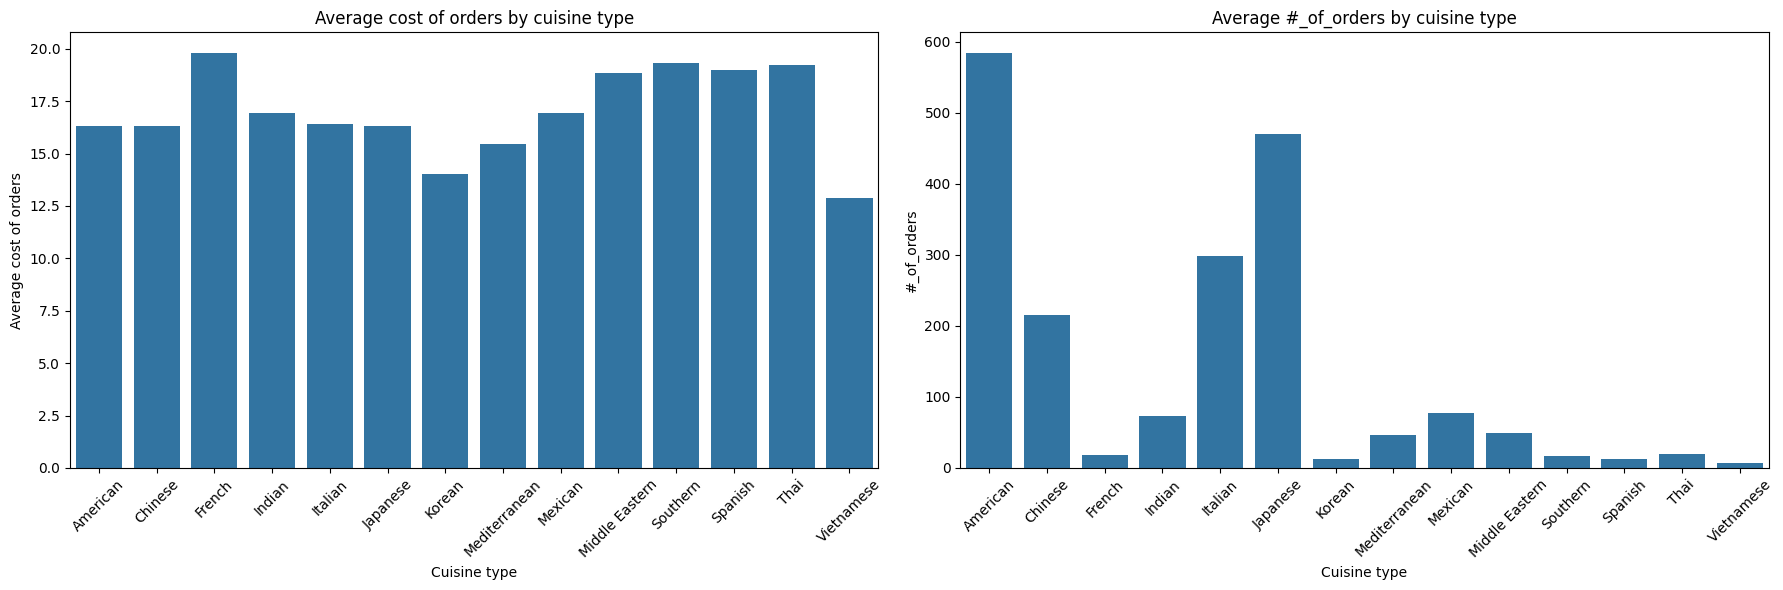

In [105]:
cuisine_type_group_by = df.groupby('cuisine_type')
cuisine_type_average_cost_of_order = cuisine_type_group_by['cost_of_the_order'].mean().reset_index()
order_counts = cuisine_type_group_by['order_id'].count().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=cuisine_type_average_cost_of_order, x='cuisine_type', y='cost_of_the_order', ax=axs[0])
axs[0].set_title('Average cost of orders by cuisine type');
axs[0].set_xlabel('Cuisine type');
axs[0].set_ylabel('Average cost of orders');
axs[0].tick_params(axis= 'x', rotation=45);

sns.barplot(data=order_counts, x='cuisine_type', y='order_id', ax=axs[1])
axs[1].set_title('Average #_of_orders by cuisine type');
axs[1].set_xlabel('Cuisine type');
axs[1].set_ylabel('#_of_orders');
axs[1].tick_params(axis= 'x', rotation=45);
plt.tight_layout();
plt.show();



*   The most popular cuisines (American, Japanese, Italian, and Mexican) have mid-range prices, showing that customers prefer affordability plus familiarity.
* Japanese cuisine uniquely combines relatively higher pricing with high demand, indicating strong customer preference despite the cost.
* The cheapest cuisines (Mediterranean, Korean, Vietnamese) still have low order counts, showing that low cost alone does not guarantee popularity.
* Overall, there is no direct correlation between cuisine price and order volume—customer preferences are driven more by familiarity and availability than by price



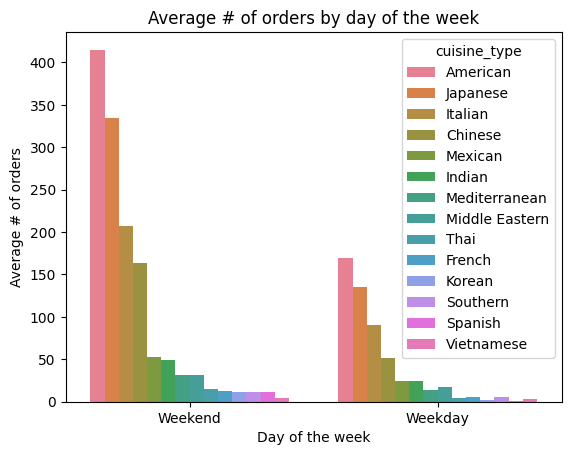

In [106]:
avg_count_of_order = df.groupby(['day_of_the_week','cuisine_type'])['order_id'].count().reset_index().sort_values(['day_of_the_week','order_id'], ascending=False)

sns.barplot(data=avg_count_of_order, x='day_of_the_week', y='order_id', hue='cuisine_type');
plt.title('Average # of orders by day of the week');
plt.xlabel('Day of the week');
plt.ylabel('Average # of orders');
plt.show()



*   Overall weekend demand is pretty high than weekdays, almost 2x-3x the volume of orders
*   American cusine is most popular on both weekends and weekdays followed by Japanese
* Even Italian and Chinese cuisine show good demand especially on weekends
* Cuisines such as Vietnamese, Korean, French, and Spanish have very low order counts on both days, indicating niche customer interest.
* The pattern suggests that FoodHub should allocate more resources (kitchen staff, drivers) on weekends to handle the demand surge.



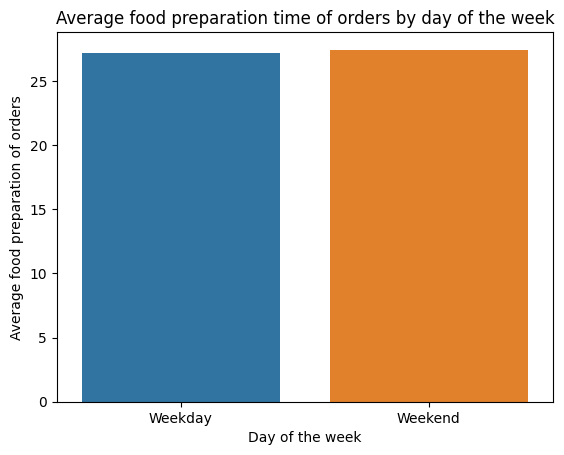

In [107]:
avg_food_prep_time = df.groupby('day_of_the_week')['food_preparation_time'].mean().reset_index()

sns.barplot(data=avg_food_prep_time, x='day_of_the_week', y='food_preparation_time', hue='day_of_the_week');
plt.title('Average food preparation time of orders by day of the week');
plt.xlabel('Day of the week');
plt.ylabel('Average food preparation of orders');
plt.show()

* Food preparation time is almost same on weekday and weekend





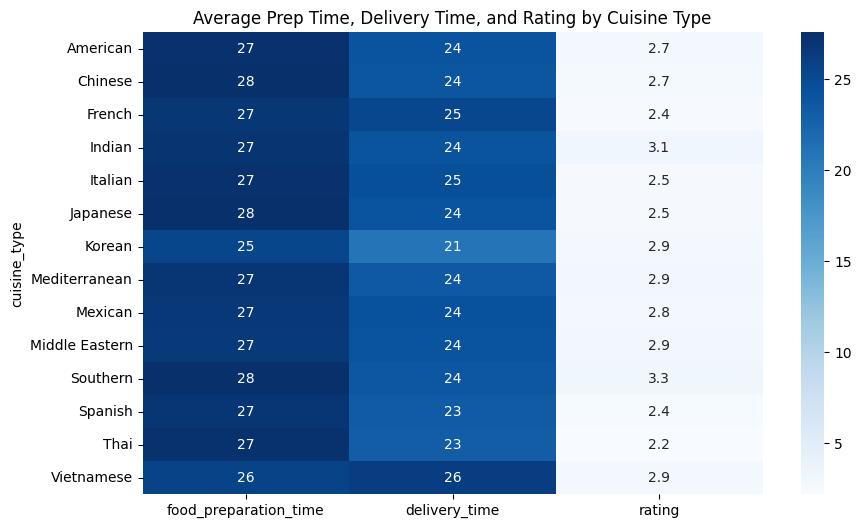

In [108]:
cuisine_stats = df.groupby('cuisine_type')[['food_preparation_time',
                                            'delivery_time',
                                            'rating']].mean().round(2)

plt.figure(figsize=(10,6))
sns.heatmap(cuisine_stats, annot=True, cmap='Blues')
plt.title("Average Prep Time, Delivery Time, and Rating by Cuisine Type")
plt.show()

* Prep and delivery times are nearly identical across all cuisine types, with prep times around 26–28 minutes and delivery times around 23–25 minutes — showing strong operational consistency.

* Customer ratings are also very similar for all cuisines, mostly in the 2.6–2.8 range, indicating no cuisine stands out as significantly better or worse in customer satisfaction.

* There is no meaningful relationship between prep time, delivery time, or rating — cuisines that take longer to prepare or deliver do not receive lower ratings.

* Cuisine-level differences are minimal overall, suggesting that delays, kitchen load, or delivery complexity do not vary much by cuisine.

* Customer satisfaction seems driven by factors outside prep/delivery speeds, such as restaurant quality, taste, packaging, or expectations — not operational timing.

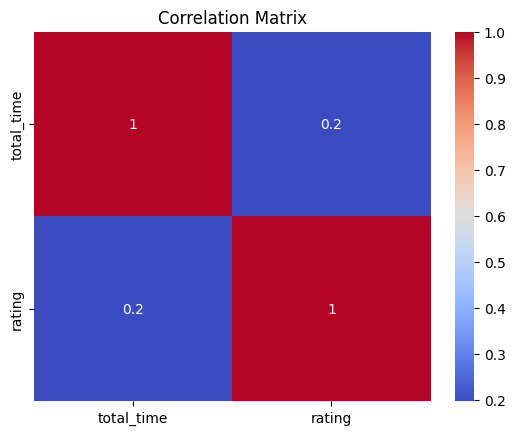

In [109]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
avg_rating = df.groupby('total_time')['rating'].mean().reset_index()

sns.heatmap(data=avg_rating.corr(), annot=True, cmap='coolwarm');
plt.title('Correlation Matrix');
plt.show();

* Total wait time does not meaningfully affect customer ratings in this dataset as correlation is 0.2 which indicates very weak correlation

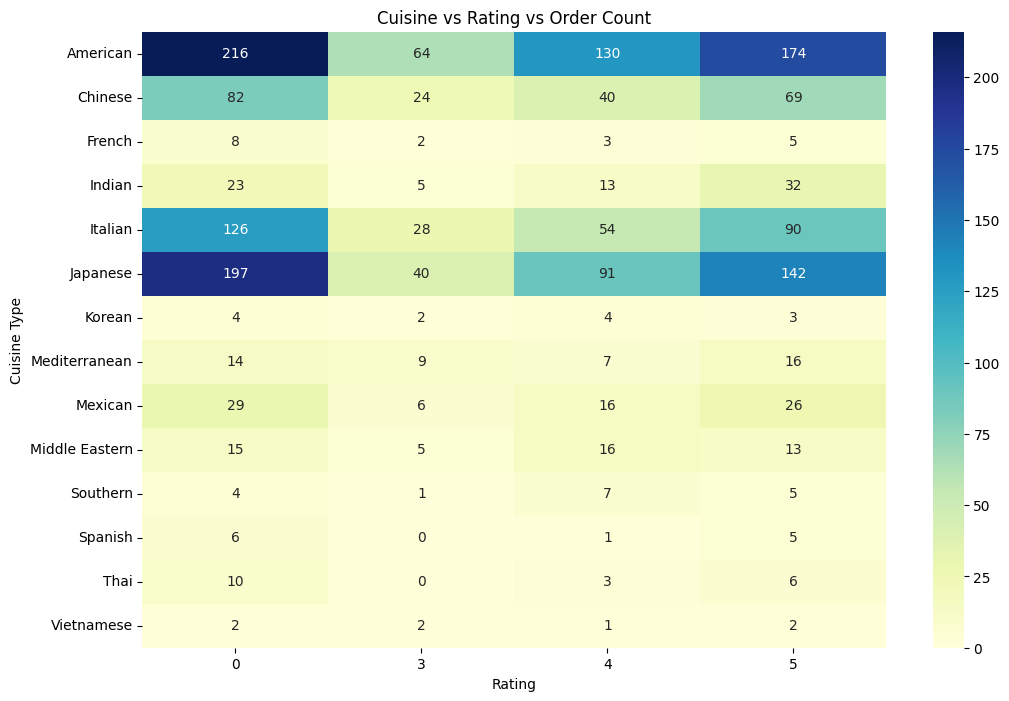

In [110]:
cuisine_rating_counts = (
    df.groupby(['cuisine_type', 'rating'])['order_id']
      .count()
      .reset_index()
)

pivot_heatmap = cuisine_rating_counts.pivot(
    index='cuisine_type',
    columns='rating',
    values='order_id'
).fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_heatmap, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Cuisine vs Rating vs Order Count")
plt.xlabel("Rating")
plt.ylabel("Cuisine Type")
plt.show()

* American and Japanese cuisines dominate the platform, receiving the highest number of ratings across all rating levels — especially 0-star (“Not given”) and 5-star ratings. These two cuisines clearly drive the bulk of FoodHub’s order volume.

* Italian and Chinese cuisines form the second-highest tier, showing strong demand with solid counts in the 4-star and 5-star categories, indicating consistent customer satisfaction.

* Mid-range cuisines (Mexican, Mediterranean, Middle Eastern, Indian) show moderate but steady rating activity, suggesting smaller but loyal customer segments.

* Smaller cuisines like Vietnamese, Korean, French, Spanish, and Thai have very low order and rating counts, indicating limited but possibly specialized customer interest.

* Overall, there is no cuisine that receives disproportionately low ratings—even less popular cuisines have rating distributions similar to others. This shows that quality perception is consistent across cuisine types, and differences in order volume are driven more by familiarity and customer preference than by satisfaction.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [111]:
df_valid = df[df['rating'] > 0]
restaurant_group = df_valid.groupby('restaurant_name')

restaurant_rating_count = restaurant_group['rating'].count().sort_values(ascending=False).reset_index()
restaurant_avg_rating = restaurant_group['rating'].mean().sort_values(ascending=False).reset_index()

eligible_restaurants = restaurant_rating_count.merge(restaurant_avg_rating, on='restaurant_name').sort_values(['rating_x', 'rating_y'], ascending=False)

eligible_restaurants[(eligible_restaurants['rating_x'] > 50) & (eligible_restaurants['rating_y'] > 4)]

,restaurant_name,rating_x,rating_y
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


Assumptions Made

* “Not given” is treated as missing data, not as a rating of zero.
* so when calculating average only the ratings which are greater than zero were considered

Summary

* There are 4 restaurants that meet the criteria based on above assumption

1. Shake Shack

2. The Meatball Shop

3. Blue Ribbon Sushi

4. Blue Ribbon Fried Chicken

* Only a small group of restaurants satisfies both criteria, suggesting high standards for eligibility.

* These restaurants are strong performers and can be highlighted in promotions to boost order volume further.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [112]:
df["company_profit_on_each_order"] = df['cost_of_the_order'].apply(lambda x: x * 0.25 if x>20 else (x * 0.15 if x>5 else 0))
df["company_profit_on_each_order"].sum()

np.float64(6166.303)

#### Observations:

Companies total profit on all orders in the data set is $6,166.303.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [113]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df[df['total_time']>60].shape[0]/df.shape[0]

0.1053740779768177

#### Observations:

* 10.54% of orders take more than 60 minutes to prepare + deliver.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [114]:
df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()

,day_of_the_week,delivery_time
0,Weekday,28.340037
1,Weekend,22.470022


#### Observations:
* Weekday avg delivery_time is 28.3 m and weekend avg delivery time is 22.4 m
* Orders are delivered close to 6 m earlier on weekends than weekdays, indicates bussinesses are prepared for the order spike on weekends


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* American and Japanese cuisines dominate FoodHub’s order volume, indicating strong customer preference for familiar and widely available food options. Italian and Chinese follow as the next most demanded cuisines.

* Weekend demand is significantly higher (2–3×) than weekday demand, but restaurants and delivery partners manage this volume efficiently, as weekend deliveries are ~6 minutes faster on average.

* Food preparation and delivery times are consistent across cuisines, with prep times around 26–28 minutes and delivery times around 23–25 minutes.
There are no major operational bottlenecks tied to cuisine type.

* Customer ratings do not correlate with cost, prep time, or delivery time.
Customer satisfaction appears to depend more on taste, quality, packaging, or service rather than speed.

* Around 29\% of orders exceed \$20, contributing significantly to revenue.
Total company revenue from commissions is $6,166, showing healthy revenue generation given the dataset size.

* Only ~10.5% of orders take more than 60 minutes, meaning long wait times are relatively uncommon.

* Rating distribution shows that customers either give a 5-star or no rating at all, with almost no mid-range ratings, suggesting limited engagement with detailed feedback.

* A significant portion of customers do not leave ratings, which weakens the feedback loop for restaurants. This reduces FoodHub’s ability to identify high-performing or low-performing partners.

### Recommendations:

* Allocate more delivery and kitchen resources on weekends, as demand surges but customers still expect fast delivery. Maintaining the current weekend efficiency should remain a priority.

* Improve visibility and marketing for high-rated but low-demand cuisines like Vietnamese, Korean, French, and Spanish. These cuisines show good satisfaction but low order volume — strong candidates for promotional campaigns.

* Encourage customers to provide ratings by offering small incentives (reward points, discount coupons). Better rating data will help identify which restaurants need intervention.

* Feature high-performing restaurants (high rating count + average rating >4) prominently in the app’s promotional banners to increase conversions.

* Focus premium promotions on cuisines where customers already accept higher pricing (e.g., Japanese), as these customers show willingness to pay for perceived quality.

* Monitor total delivery time but prioritize improving restaurant quality and packaging, since these factors influence ratings more than speed.

* Since only ~10.5% of orders exceed 60 minutes total time, but these significantly risk dissatisfaction, consider investigating these specific orders by cuisine/restaurant/day to reduce this tail.

---